### Import dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.model_selection import train_test_split

In [2]:
# This block will extract all the chunks // for now we will procede with only 1
file_path = "C:/Users/Asus/Desktop/Econom/Period 5/Data Mining/Assignment_2-practice/training_set_VU_DM.csv"
# chunksize = 1000000  # Specify the number of rows to read in each chunk
# chunks = []

# # Read the CSV file in chunks
# for chunk in pd.read_csv(file_path, chunksize=chunksize):
#     # Process each chunk (example: select specific columns or apply a function)
#     processed_chunk = chunk[['column1', 'column2']]
    
#     # Append the processed chunk to the list
#     chunks.append(processed_chunk)

# # Concatenate the processed chunks into a single DataFrame
# result_df = pd.concat(chunks)

In [3]:
# it separates the data in chunks but does not return the chunk
df = pd.read_csv(file_path) #, chunksize=chunksize)

In [4]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [5]:
# # obtain the chunk dataset
# df_sample = df.get_chunk()

#### Exploring each variable that could be important

# 1. Search ID

In [6]:
print('Number of different customers is ', len(df['srch_id'].unique()))
df['srch_id'].value_counts()

Number of different customers is  199795


244169    38
149527    38
223395    38
250956    38
6611      37
          ..
141076     5
170616     5
188142     5
110693     5
319453     5
Name: srch_id, Length: 199795, dtype: int64

# 2. Price USD

In [7]:
'Min price is ', df['price_usd'].min(), ' max price is ', df['price_usd'].max()

('Min price is ', 0.0, ' max price is ', 19726328.0)

In [8]:
df['price_usd'].value_counts()

99.00     76129
119.00    65077
109.00    64317
89.00     62561
129.00    56130
          ...  
566.55        1
756.07        1
745.18        1
672.06        1
818.18        1
Name: price_usd, Length: 76465, dtype: int64

# 3. Date

##### Around 1m visits took place in 2012, and 4m in 2013"

In [24]:
df['date_time'].min(), df['date_time'].max()

('2012-11-01 00:08:29', '2013-06-30 23:58:24')

# 4. Competition variables (sample)
###    Comp_rate --> If expedia had better / worse prices than competition
###    Comp_inv --> availability of the hotels in Expedia / competition
###    Comp_rate_percent_diff --> difference in perc. betwenn expedia's hotels and competition

In [9]:
df['comp1_rate'].value_counts()

 1.0    67256
 0.0    42959
-1.0     9715
Name: comp1_rate, dtype: int64

In [10]:
df['comp1_inv'].value_counts()

 0.0    122599
 1.0      5492
-1.0      1468
Name: comp1_inv, dtype: int64

In [11]:
df['comp1_rate_percent_diff'].value_counts()

9.0       11317
6.0       11082
7.0        9156
10.0       8582
15.0       8515
          ...  
5273.0        1
6300.0        1
4803.0        1
2195.0        1
2682.0        1
Name: comp1_rate_percent_diff, Length: 1830, dtype: int64

In [12]:
## Checking exactly which variables are missing and how much is missing
miss_values = []

for var in df.columns:
    if df[var].isna().any():
        miss_values.append((var, df[var].isna().sum()))

miss_values.sort(key=lambda x: x[1], reverse= True)

for column, missing_count in miss_values:
    print('For varaible: ', column, " the number of missing values is ", missing_count, 'Non-missings are {}'.format(len(df) - missing_count))

For varaible:  comp1_rate_percent_diff  the number of missing values is  4863908 Non-missings are 94439
For varaible:  comp6_rate_percent_diff  the number of missing values is  4862173 Non-missings are 96174
For varaible:  comp1_rate  the number of missing values is  4838417 Non-missings are 119930
For varaible:  comp1_inv  the number of missing values is  4828788 Non-missings are 129559
For varaible:  comp4_rate_percent_diff  the number of missing values is  4827261 Non-missings are 131086
For varaible:  gross_bookings_usd  the number of missing values is  4819957 Non-missings are 138390
For varaible:  comp7_rate_percent_diff  the number of missing values is  4819832 Non-missings are 138515
For varaible:  comp6_rate  the number of missing values is  4718190 Non-missings are 240157
For varaible:  visitor_hist_starrating  the number of missing values is  4706481 Non-missings are 251866
For varaible:  visitor_hist_adr_usd  the number of missing values is  4705359 Non-missings are 252988


### Concluson :
#### In terms of competition the least values that are missing are for competitors: 2,3,5,8
#### The most missings are for competitors: 1, 4, 6

# 5. Country-related variables

In [56]:
# There is an issue with this variable, because 
# it says there are 210 countries, whereas there are just 195 in the world
df['visitor_location_country_id'].value_counts()

219    2892489
100     495476
55      290461
216     217385
220     174296
        ...   
226         25
190         24
146         15
83          13
150          8
Name: visitor_location_country_id, Length: 210, dtype: int64

In [58]:
# This one is more reasonable as it shows there are hotels from 172 countries which is fine
df['prop_country_id'].value_counts()

219    3030125
100     311283
55      186465
31      154287
99      135388
        ...   
180         12
7           10
126          7
204          5
165          2
Name: prop_country_id, Length: 172, dtype: int64

In [59]:
# We should keep this correlation in mind, because it could be important. It can state
# that cust buys room in same country or in a specific country abroad, etc...
df['prop_country_id'].corr(df['visitor_location_country_id'])

0.48278697988866043

# 6. Property data

In [60]:
# There had been 129k hotels on display for the time period
df['prop_id'].value_counts()

104517    2357
124342    2355
68420     2285
40279     2275
134154    2257
          ... 
115439       1
134795       1
57042        1
66680        1
87173        1
Name: prop_id, Length: 129113, dtype: int64

In [61]:
# How many stars was the hotel (where 0 is none or this info is not available)
df['prop_starrating'].value_counts()

3    1947598
4    1521448
2     895894
5     406485
0     169572
1      17350
Name: prop_starrating, dtype: int64

In [63]:
# The rating of the hotels
df['prop_review_score'].value_counts()

4.0    1556948
4.5    1546880
3.5     768054
3.0     375905
5.0     235947
0.0     233294
2.5     143886
2.0      62301
1.5      14465
1.0      13303
Name: prop_review_score, dtype: int64

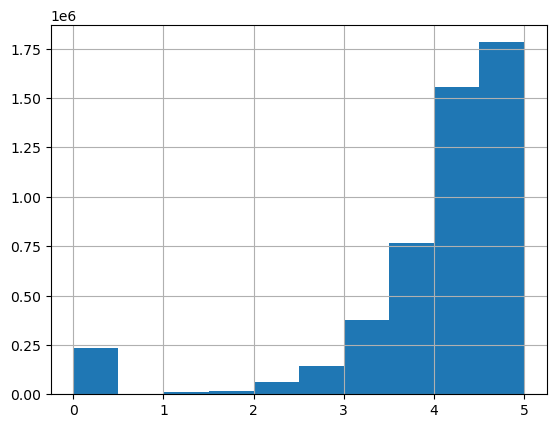

In [68]:
df['prop_review_score'].hist()
plt.show()

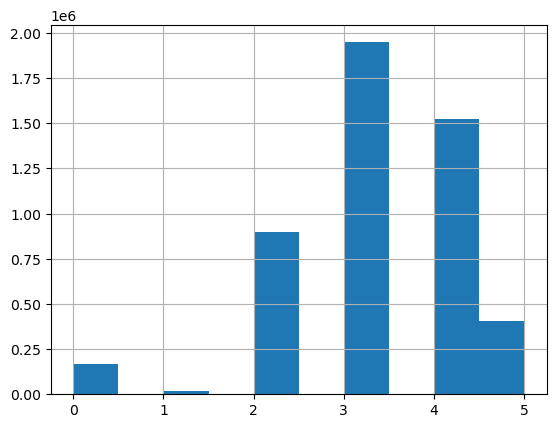

In [69]:
df['prop_starrating'].hist()
plt.show()

In [70]:
# Ratio of branded:non-branded  hotels = 3:2
df['prop_brand_bool'].value_counts()

1    3147060
0    1811287
Name: prop_brand_bool, dtype: int64

### Some info about the location variables:
The prop_location_score1 and prop_location_score2 are two different scores that measure the desirability of a hotel's location. These scores can be derived from various factors such as the distance from popular tourist attractions, the neighborhood's safety, accessibility to public transportation, and nearby amenities like restaurants and shopping centers. We can treat these scores as two separate features that provide some indication of how desirable a hotel's location is.

In [79]:
df['prop_location_score2'].max(), df['prop_location_score1'].max(),\
df['prop_location_score2'].min(), df['prop_location_score1'].min()

(1.0, 6.98, 0.0, 0.0)

A score of 0 for either prop_location_score1 or prop_location_score2 would likely indicate a low desirability for the hotel's location. This could mean that the hotel is located far from popular attractions, in an area with limited amenities, or in a neighborhood perceived as less safe.

In [80]:
# The price for which the hotel was traded // if 0 then its not traded
df['prop_log_historical_price'].value_counts()

0.00    713899
6.21     88837
5.02     36267
5.07     35177
4.98     35118
         ...  
2.55         1
2.26         1
1.67         1
2.49         1
2.34         1
Name: prop_log_historical_price, Length: 392, dtype: int64

# 7. Visitor history varaibles

In [30]:
df['visitor_hist_adr_usd'].value_counts()

128.34    609
117.68    579
270.36    514
65.00     275
117.86    250
         ... 
53.08       5
182.56      5
234.77      5
153.44      5
99.39       5
Name: visitor_hist_adr_usd, Length: 7799, dtype: int64

In [44]:
'The mean value a customer spent in the past for the hotel is ', df['visitor_hist_adr_usd'].mean(),\
' The max value a cust spent before was ', df['visitor_hist_adr_usd'].max(),\
' and the min value was ', df['visitor_hist_adr_usd'].where(df['visitor_hist_adr_usd'] > 0.0).nsmallest(1).min()

('The mean value a customer spent in the past for the hotel is ',
 176.02265913798277,
 ' The max value a cust spent before was ',
 1958.7,
 ' and the min value was ',
 8.46)

##### 0.0 indicates that the specific customer never purchased a room

## One idea here: We can create a varaible (smth like returning customer) to check if this is the type of custoemr that regularly visits the hotel or regularly purchases rooms on Expedia (based on how many times he had bought a room, we can make a binary new variable)  Or we an compare this variable with srch_id to see how often someone searches to be classified as a 'regular' customer, or at least a seriously potential buyer'

## Also we can consider some avg. amount spent per person in the past to figure out how probably is that they buy again (e.g could be that people who spent a lot or actually almost nothing, tend to book again through expedia) - this could later be related to the competition variables to decide how price determined the visits in the past or smth like that 

## Also there could be some relation between times they visit the website and amount they spend

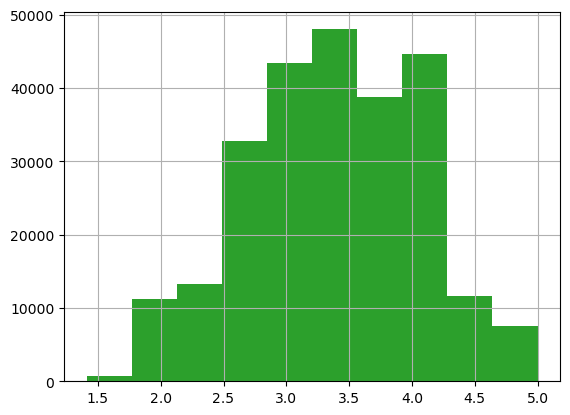

In [47]:
df['visitor_hist_starrating'].hist()
plt.show()

In [49]:
# Serious amount of the varaibles are missing
print(df['visitor_hist_starrating'].isna().sum())

4706481

In [53]:
filtered_ratings = df['visitor_hist_starrating'].where((df['visitor_hist_starrating'] >= 2.5) & (df['visitor_hist_starrating'] <= 4.5))
print("Percentage of ratings between 2.5 and 4.5: ", filtered_ratings.count()/df['visitor_hist_starrating'].count())

Percentage of ratings between 2.5 and 4.5:  0.8615970396957112


## Since this seems like a valuable variable that can determine if a customer would use Expedia for booking again, we can either keep it as it is (or potentially impute random values between 1.5 and 5 based on the above almost normal distribution)

# 8.Variables that are only for the training: Position, click_bool, booking_bool, gross_booking_usd

In [13]:
df['position'].max()

40

In [14]:
df['click_bool'].value_counts()
# if value is 1, cust. clicked on it

0    4736468
1     221879
Name: click_bool, dtype: int64

In [15]:
df['booking_bool'].value_counts()
# if value is 1, cust. booked the hotel

0    4819957
1     138390
Name: booking_bool, dtype: int64

#### The price for the actuall gross booking and the price shown on the offer differs ( mean values are similar, however the outliers are quite different ( and possibly it's not only due to texes, fees and conventions)) /// maybe its currency related (although the big outliers are in USD, whereas the reasonable values for price are not specified by a currency.)

In [16]:
df['gross_bookings_usd'].min(), df['gross_bookings_usd'].max(), df['gross_bookings_usd'].mean(),\
df['price_usd'].min(), df['price_usd'].max(), df['price_usd'].mean()

(0.0, 159292.38, 386.28331591878015, 0.0, 19726328.0, 254.20958985524828)

In [17]:
df['price_usd'].max() - df['gross_bookings_usd'].max()

19567035.62

In [18]:
# Correlation between the two prices tho is low
df['price_usd'].corr(df['gross_bookings_usd'])

0.007575328286871014

# 9.Promotion var

In [81]:
# Almost 1/5th hotels offered a discount
df['promotion_flag'].value_counts()

0    3889229
1    1069118
Name: promotion_flag, dtype: int64

# 10. Search-related varaibles

In [82]:
df['srch_destination_id'].value_counts()

8192     69832
4562     57090
9402     40629
8347     33274
10979    33264
         ...  
2405         5
21979        5
16506        5
4036         5
22915        5
Name: srch_destination_id, Length: 18127, dtype: int64

# Correlations

In [19]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# Create a correlation matrix
corr = df[numeric_cols].corr()

# Set the threshold for correlation coefficient
threshold = 0.5
# Filter out the correlations below the threshold
corr_high = corr[(corr > threshold) | (corr < -threshold)]

# # Set values below the threshold to NaN
# corr_high_filtered = corr_high.mask((corr_high <= threshold)&(corr_high >= -threshold))

# # remove the NaN values
# corr_high_filtered = corr_high_filtered.dropna(how='all', axis=0).dropna(how='all', axis=1)

In [20]:
# Stack the DataFrame to create a multi-level index Series
non_nan_corr = corr_high.stack()

corr_list = []
# Iterate through the index and values of the non-NaN correlations
for index, value in non_nan_corr.iteritems():
    if (index not in corr_list) & (index[::-1] not in corr_list) & (value != 1):
        print(f"Correlation between {index[0]} and {index[1]}: {value}")
        corr_list.append(index)
        corr_list.append(index[::-1])
    else:
        continue

Correlation between comp1_inv and comp5_inv: 0.5121213979079385
Correlation between comp2_rate and comp3_rate: 0.5100666193765137
Correlation between comp3_rate_percent_diff and comp5_rate_percent_diff: 0.5906580901194612
Correlation between comp3_rate_percent_diff and comp8_rate_percent_diff: 0.6349621788609786
Correlation between comp4_rate and comp8_rate: 0.5101329329438802
Correlation between comp5_rate and comp8_rate: 0.6366047920686759
Correlation between comp5_rate_percent_diff and comp8_rate_percent_diff: 0.5083390855828661
Correlation between comp6_rate and comp7_rate: 0.5100585883051445
Correlation between click_bool and booking_bool: 0.782888613406975


<ipython-input-20-f488bc4d1006>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in non_nan_corr.iteritems():


## These 2 correlations seems significant, so should be taken into account: click_bool and booking_bool: 0.782888613406975

In [21]:
# Correlation between the booking, click and the position 
position_click_corr = df['position'].corr(df['click_bool'])
position_booking_corr = df['position'].corr(df['booking_bool'])

print("Correlation between position and click_bool:", position_click_corr)
print("Correlation between position and booking_bool:", position_booking_corr)

Correlation between position and click_bool: -0.16499244508537037
Correlation between position and booking_bool: -0.1479184993886952


## Variable 

# Next task:

### - Finish with the srch_variables

### -Extract a stratified chunk of the train and the data, to have good representation of the variables within a small DF and run a regularization technique like LASSO / ElasticNet

### -Use the Imputer from Sklearn to try and impute values for varaibles that are not missing >60 % of the data???